# Plots o graficos de datos
Son graficos, formas tremendamente buenas de poder representar lo que tenemos en el Dataset y reconocer las relaciones que existen entre las variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #para comparar pares de varaibles y graficar
import numpy as np #funciones matematicas

In [2]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

In [14]:
%matplotlib inline 

**Para guardar un grafico como imagen** podemos usar: 
```python
savefig("path_donde_guardar.jpeg")
```

## ScaterPlot

es un grafico de puntos de dos dimensiones x y

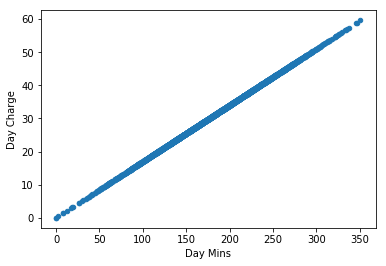

In [4]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")#pinto grafico

Vemos una relación lineal entre los datos, mas adelante la veremos en funciones de regresion lineal, pero aqui, esta mas que claro que es asi sin necesidad de algoritmos

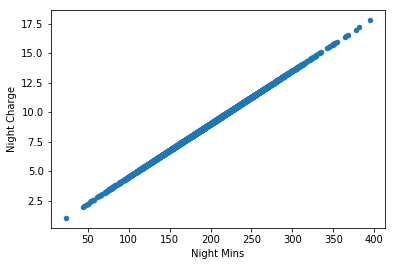

In [5]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")#pinto grafico

Entre la carga de noche y cuanto hablo tambien tengo la misma relacion lineal. A mas carga mas minutos se habla

## Una matriz de graficos
Para ello utilizamos la libreria  _matplotlib.pyplot_ 

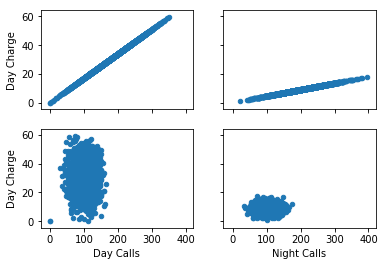

In [6]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
# aqui debajo vamos a colocar uno por uno los datos que queremos graficar (hacerlo aqui es obligatorio para que se vean en ese grafico 2*2)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])#pinto grafico
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
#-- 
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

## Histograma de frecuencia
Es un gran modo de ver como se distribuye una varaible numerica

Text(0.5,1,'Histograma Numero de llamadas al dia')

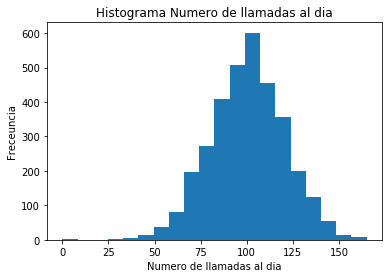

In [7]:
plt.hist(data["Day Calls"], bins=20)#puedo decir en cuantos pedacitos quiero que se parta el grafico
#a continuacion ponemos lables al grafico
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Freceuncia")
plt.title("Histograma Numero de llamadas al dia")

Tambien puedo decirle en que lugar exacto quiero se haga la division de los datos

Text(0.5,1,'Histograma Numero de llamadas al dia')

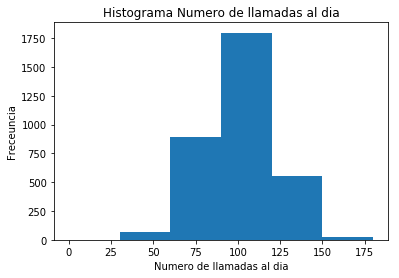

In [8]:
plt.hist(data["Day Calls"], bins=[0,30,60,90,120,150,180])#puedo decir en cuantos pedacitos quiero que se parta el grafico
#a continuacion ponemos lables al grafico
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Freceuncia")
plt.title("Histograma Numero de llamadas al dia")

La [regla de Struges](https://es.wikipedia.org/wiki/Regla_de_Sturges) te indica cuantas divisiones se deben elaborar en un histograma **vamos a usarla a continuacion**

Text(0.5,1,'Histograma Numero de llamadas al dia')

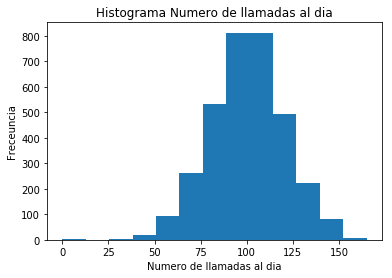

In [9]:
k = int(np.ceil(1+np.log2(3333))) #aplico la regla de Struges, convierto a entero y redondeo. Resutlado= 13
plt.hist(data["Day Calls"], bins=k)
#a continuacion ponemos lables al grafico
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Freceuncia")
plt.title("Histograma Numero de llamadas al dia")

## Boxplot Diagrama de caja y bigotes

Este diagrama es muy curioso. Es una caja que ocupa el 50% de la distribucion de los datos y los divide en los mayores e inferiores teniendo en cuenta los percentiles del 25% y 75%

Text(0.5,1,'Boxplot llamadas diarias')

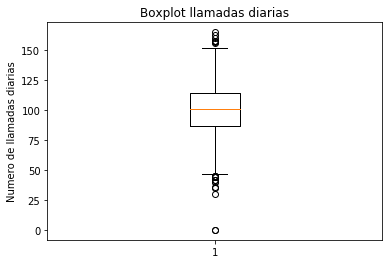

In [15]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Numero de llamadas diarias")
plt.title("Boxplot llamadas diarias")

data["Day Calls"].describe()

El **rango intercuartilico o IQR** es el resultado de la resta entre el percentil 75 - el percentil 25. En este caso es **25** se refeire a la altura de la caja.


In [18]:
IQR = data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)
IQR

27.0

Podemos hacernos una idea de donde acaba el bigote inferior asi:

In [19]:
data["Day Calls"].quantile(0.25)- 1.5*IQR

46.5

Ahora para ver donde acaba el bigote superior:

In [20]:
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5

Las **bolitas** son outlayers o valores fuera de rango. Son atipicos a la distribucion ya sea muy por encima o muy por debajo